In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True

In [2]:
projects = os.listdir("results/GroundTruths/")
projects.remove("AcmeAir.json")
results = []
for proj in projects:
	with open(f"results/GroundTruths/{proj}") as f:
		data = json.load(f)
	del data["microservices"]
	data["Application"] = proj.split(".")[0]
	data["Method"] = "Original"
	results.append(data)

	with open(f"results/Mo2oM/Mo2oM_{proj}") as f:
		data = json.load(f)
	df = pd.DataFrame(data).drop(columns=["microservices"])
	normalized_df = pd.DataFrame(MinMaxScaler().fit_transform(df.values), columns=df.columns)
	df['score'] = normalized_df["SM"] - normalized_df["ICP"] - normalized_df["IFN"] - normalized_df["NED"]
	idx = df["score"].argmax()
	d = df.drop(columns=["n_clusters", "alpha", "threshold", "score"]).iloc[idx]
	d["Application"] = proj.split(".")[0]
	d["Method"] = "Mo2oM"
	results.append(d)

df = pd.DataFrame(results)
df = df[["Application", "Method", "SM", "ICP", "IFN", "NED"]]
pt = df.pivot(index="Application", columns="Method", values=["SM", "ICP", "IFN", "NED"])
pt = pt.sort_index(axis=1, key=lambda x: [["Original", "Mo2oM", "SM", "ICP", "IFN", "NED"].index(_) for _ in x])
tex = pt.to_latex(float_format="%.3f", label="tab:fine-tuning", position="t", caption=r"Standard metrics for fourteen real-world microservices “ground-truth” applications. All systems exhibit low structural modularity (SM), high coupling (ICP), and uneven service distributions (NED), underscoring the challenge of reproducing expert decompositions without a soft-clustering approach.")
tex = tex.replace("SM", r"\textbf{SM} $\uparrow$").replace("ICP", r"\textbf{ICP} $\downarrow$").replace("IFN", r"\textbf{IFN} $\downarrow$").replace("NED", r"\textbf{NED} $\downarrow$").replace("table", "table*")
print(tex)

\begin{table*}[t]
\caption{Standard metrics for fourteen real-world microservices “ground-truth” applications. All systems exhibit low structural modularity (\textbf{SM} $\uparrow$), high coupling (\textbf{ICP} $\downarrow$), and uneven service distributions (\textbf{NED} $\downarrow$), underscoring the challenge of reproducing expert decompositions without a soft-clustering approach.}
\label{tab:fine-tuning}
\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{2}{r}{\textbf{SM} $\uparrow$} & \multicolumn{2}{r}{\textbf{ICP} $\downarrow$} & \multicolumn{2}{r}{\textbf{IFN} $\downarrow$} & \multicolumn{2}{r}{\textbf{NED} $\downarrow$} \\
Method & Original & Mo2oM & Original & Mo2oM & Original & Mo2oM & Original & Mo2oM \\
Application &  &  &  &  &  &  &  &  \\
\midrule
BlogPost & -0.020 & 0.065 & 0.629 & 0.000 & 0.250 & 0.000 & 0.467 & 0.000 \\
CQRSDemo & -0.020 & 0.559 & 0.254 & 0.074 & 0.667 & 0.500 & 0.121 & 0.000 \\
ConsulDemo & 0.007 & 0.314 & 0.248 & 0.027 & 1.333 & 0.000 & 0.000 & 0

In [3]:
print(df.to_latex(float_format="%.3f", index=False, caption="Ground Truths").replace("SM & ICP & IFN & NED", r"\textbf{SM $\uparrow$} & \textbf{ICP $\downarrow$} & \textbf{IFN $\downarrow$} & \textbf{NED $\downarrow$}"))

\begin{table}
\caption{Ground Truths}
\begin{tabular}{llrrrr}
\toprule
Application & Method & \textbf{SM $\uparrow$} & \textbf{ICP $\downarrow$} & \textbf{IFN $\downarrow$} & \textbf{NED $\downarrow$} \\
\midrule
LakesideMutual & Original & 0.018 & 0.066 & 3.500 & 1.000 \\
LakesideMutual & Mo2oM & 0.366 & 0.038 & 7.750 & 0.080 \\
PetClinic & Original & 0.065 & 0.402 & 1.250 & 0.102 \\
PetClinic & Mo2oM & 0.185 & 0.054 & 0.167 & 0.026 \\
SocialSoftwareEdition & Original & 0.160 & 0.404 & 8.625 & 0.927 \\
SocialSoftwareEdition & Mo2oM & 1.000 & 0.000 & 5.500 & 0.000 \\
MicroservicesEventSourcing & Original & 0.018 & 0.198 & 0.500 & 0.265 \\
MicroservicesEventSourcing & Mo2oM & 0.098 & 0.042 & 0.000 & 0.000 \\
MicroservicesBook & Original & 0.017 & 0.223 & 0.667 & 0.115 \\
MicroservicesBook & Mo2oM & 0.299 & 0.000 & 0.000 & 0.000 \\
SpringCloudNetflixExample & Original & 0.013 & 0.000 & 0.000 & 0.500 \\
SpringCloudNetflixExample & Mo2oM & 0.016 & 0.000 & 0.000 & 0.000 \\
QBike & Original 

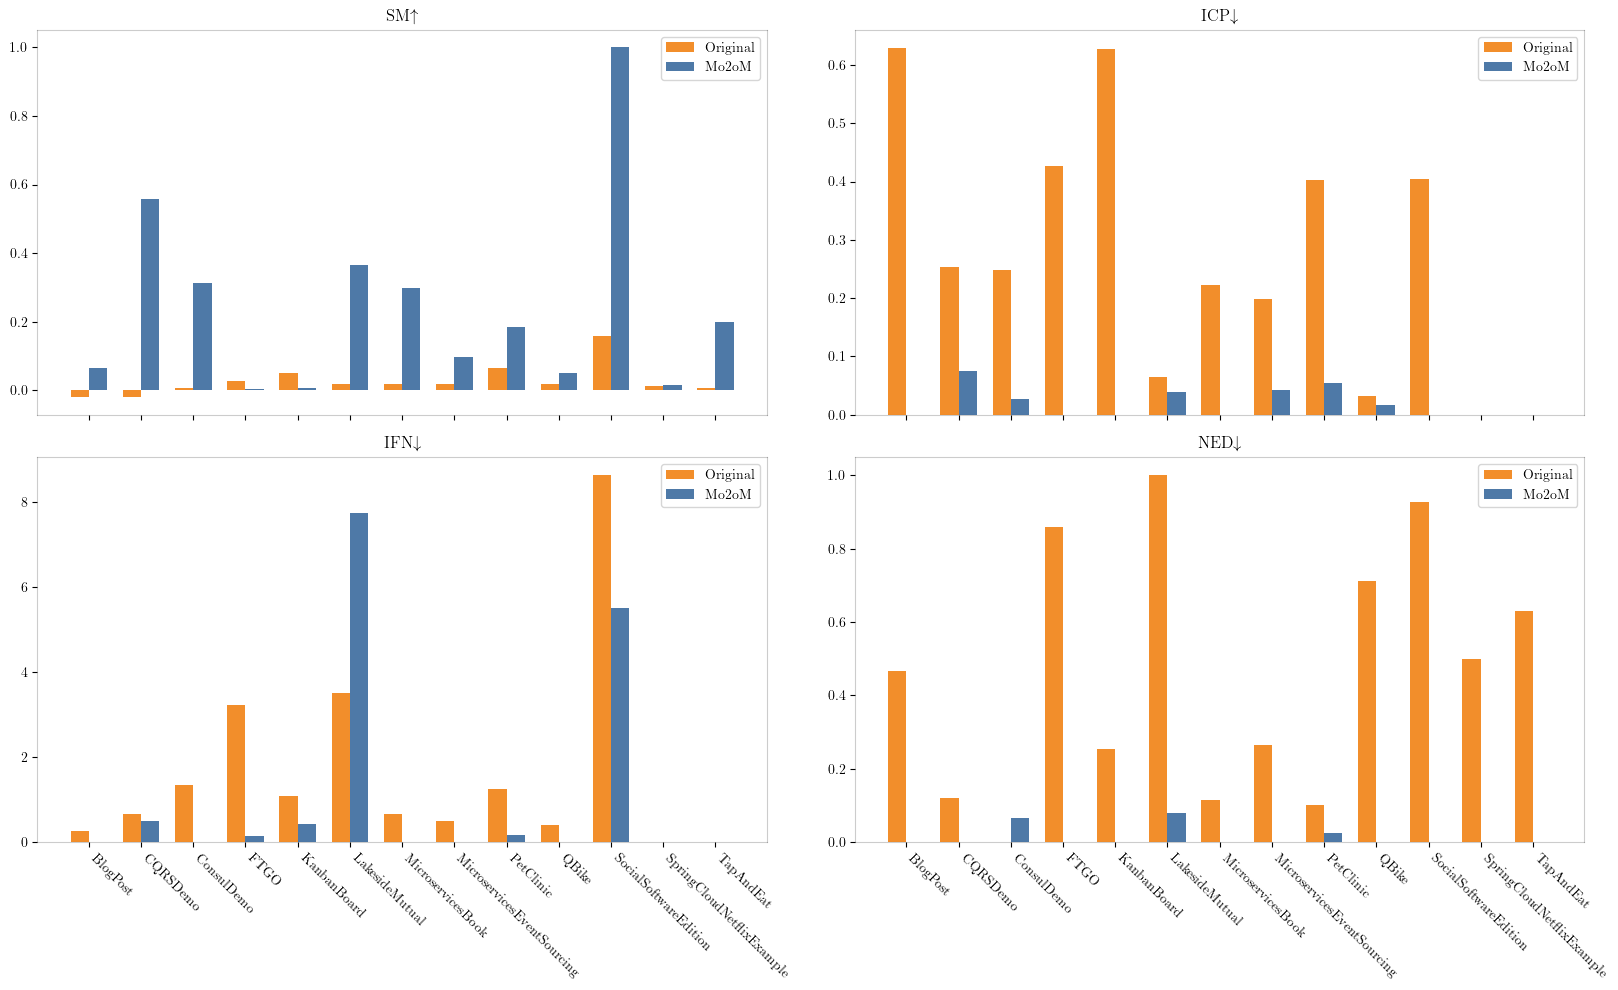

In [ ]:
metric_dirs = ["$\\uparrow$", "$\\downarrow$", "$\\downarrow$", "$\\downarrow$"]
fig, axes = plt.subplots(2, 2, figsize=(16.5, 10), sharex=True)
axes = axes.flatten()

bar_width = 0.35
for idx, metric in enumerate(["SM", "ICP", "IFN", "NED"]):
	df_pivot = df.pivot(index="Application", columns="Method", values=metric)
	r1 = np.arange(len(df_pivot))
	r2 = [x + bar_width for x in r1]
	axes[idx].bar(r1, df_pivot["Original"], color='#f28e2b', width=bar_width, label="Original")
	axes[idx].bar(r2, df_pivot["Mo2oM"], color='#4e79a7', width=bar_width, label="Mo2oM")
	axes[idx].set_title(metric+metric_dirs[idx])
	axes[idx].set_xticks([r + bar_width / 2 for r in range(len(df_pivot))])
	axes[idx].set_xticklabels(df_pivot.index, rotation=-45, ha='left')
	axes[idx].legend()
	for spine in axes[idx].spines.values():
		spine.set_alpha(0.2)
plt.tight_layout()
plt.show()
fig.savefig("refactoring.pdf", format="pdf", bbox_inches="tight")

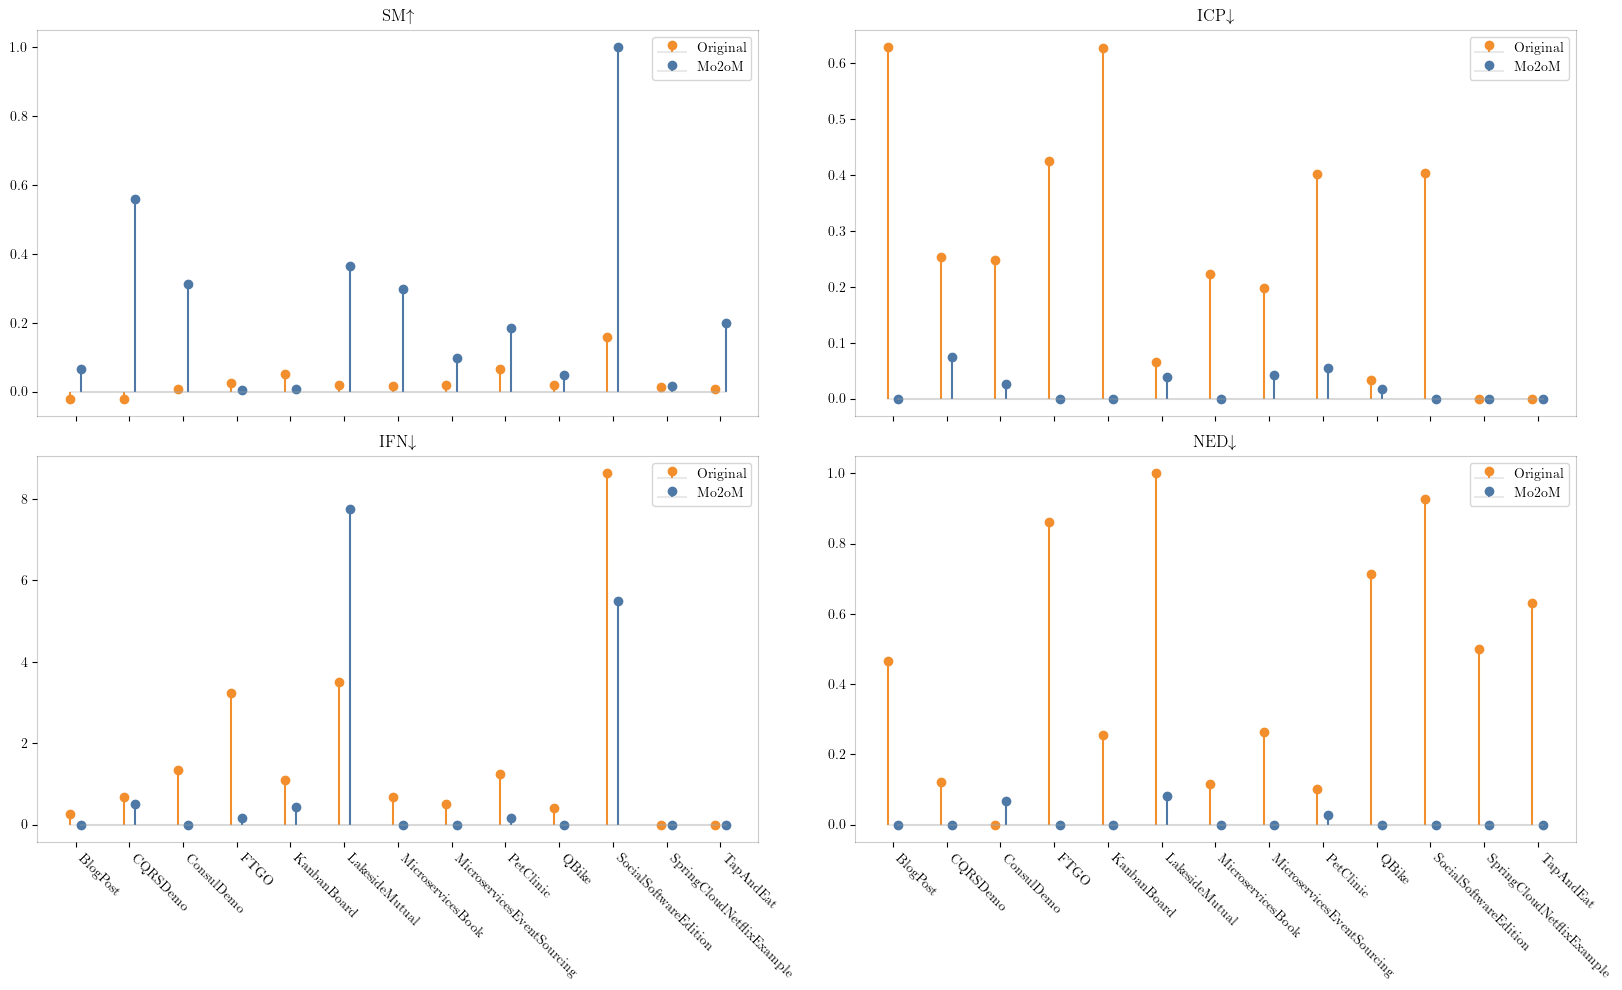

In [8]:
metric_dirs = ["$\\uparrow$", "$\\downarrow$", "$\\downarrow$", "$\\downarrow$"]
fig, axes = plt.subplots(2, 2, figsize=(16.5, 10), sharex=True)
axes = axes.flatten()

bar_width = 0.2
for idx, metric in enumerate(["SM", "ICP", "IFN", "NED"]):
	df_pivot = df.pivot(index="Application", columns="Method", values=metric)
	r1 = np.arange(len(df_pivot))
	r2 = [x + bar_width for x in r1]
	axes[idx].stem(r1, df_pivot["Original"], linefmt='#f28e2b', basefmt='#aaaaaa40', label='Original')
	axes[idx].stem(r2, df_pivot["Mo2oM"], linefmt='#4e79a7', basefmt='#aaaaaa40', label="Mo2oM")
	axes[idx].set_title(metric+metric_dirs[idx])
	axes[idx].set_xticks([r + bar_width / 2 for r in range(len(df_pivot))])
	axes[idx].set_xticklabels(df_pivot.index, rotation=-45, ha='left')
	axes[idx].legend()
	for spine in axes[idx].spines.values():
		spine.set_alpha(0.2)
plt.tight_layout()
plt.show()
fig.savefig("refactoring.pdf", format="pdf", bbox_inches="tight")